<a href="https://colab.research.google.com/github/anandkc812/MaskRCNN_testscript/blob/master/mask_rcnn_multi_objectDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


import cv2
import numpy as np
import matplotlib.pyplot as plt 
from google.colab import drive
import pandas as pd
from keras.preprocessing import image

drive.mount('/content/gdrive')

img_path = '/content/gdrive/My Drive/Colab Notebooks/FastRCNNProj/ox_persons.jpg'

prototype = '/content/gdrive/My Drive/Colab Notebooks/blob-from-images/bvlc_googlenet.prototxt'
caffemodel = '/content/gdrive/My Drive/Colab Notebooks/blob-from-images/bvlc_googlenet.caffemodel'
ImageNet1kclasses = '/content/gdrive/My Drive/Colab Notebooks/blob-from-images/synset_words.txt'

rows = open(ImageNet1kclasses).read().strip().split("\n")
classes = [r[r.find(':') + 3:].split(",")[0] for r in rows]

print(classes)


# load our serialized model from disk
net = cv2.dnn.readNetFromCaffe(prototype,	caffemodel)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['1440764 tench', '1443537 goldfish', '1484850 great white shark', '1491361 tiger shark', '1494475 hammerhead', '1496331 electric ray', '1498041 stingray', '1514668 cock', '1514859 hen', '1518878 ostrich', '1530575 brambling', '1531178 goldfinch', '1532829 house finch', '1534433 junco', '1537544 indigo bunting', '1558993 robin', '1560419 bulbul', '1580077 jay', '1582220 magpie', '1592084 chickadee', '1601694 water ouzel', '1608432 kite', '1614925 bald eagle', '1616318 vulture', '1622779 great grey owl', '1629819 European fire salamander', '1630670 common newt', '1631663 eft', '1632458 spotted salamander', '1632777 axolotl', '1641577 bullfrog', '1644373 tree frog', '1644900 tailed frog', '1664065 loggerhead', '1665541 leatherback turtle', '1667114 mud turtle', '1667778 terrapin', '1669191 box turtle', '1675722 banded gecko', '1677366 common iguana', '1682714

In [0]:
# (1) load the first image from disk, (2) pre-process it by resizing
# it to 224x224 pixels, and (3) construct a blob that can be passed
# through the pre-trained network
image = cv2.imread(img_path)
resized = cv2.resize(image, (224, 224))
blob = cv2.dnn.blobFromImage(resized, 1, (224, 224), (104, 117, 123))

print("First Blob: {}".format(blob.shape))


First Blob: (1, 3, 224, 224)


In [0]:
params=cv2.SimpleBlobDetector_Params()
#Set area filtering parameters

params.filterByArea=True
params.minArea=50
#Set inertia filtering parameter
params.filterByInertia=True
params.minInertiaRatio=0.01
params.filterByConvexity=False
params.minConvexity=0.2
#params.filterByCircularity=True <--- Very Bad Result
#params.minCircularity=0.9

detector=cv2.SimpleBlobDetector_create(params)

image = cv2.imread(img_path)
resized = cv2.resize(image, (224, 224))
#blob = cv2.dnn.blobFromImage(resized, 1, (224, 224), (104, 117, 123))
blob = cv2.dnn.blobFromImage(resized, swapRB=True, crop=True)

keypoints= detector.detect(resized)

#print("First Blob: {}".format(blob.shape))
import numpy as np
blb = []

#for i in range(0, len(keypoints)):
for i in range(0, 2):
  x = keypoints[i].pt[0] #i is the index of the blob you want to get the position
  y = keypoints[i].pt[1]
  blb.append((i+1, 3, x,y))
  
#blob = np.array(blb)  
print('blobs  ',len(blob), blob )

blobs   1 [[[[ 72.  73.  72. ... 144. 146. 147.]
   [ 73.  73.  73. ... 141. 143. 145.]
   [ 74.  73.  74. ... 135. 141. 144.]
   ...
   [130. 131.  93. ... 156. 125. 186.]
   [ 93.  67. 131. ...  86. 121. 108.]
   [ 86. 104. 118. ...  84. 161.  99.]]

  [[116. 117. 116. ... 160. 158. 160.]
   [117. 117. 118. ... 156. 157. 158.]
   [118. 117. 118. ... 153. 156. 159.]
   ...
   [ 93.  91.  86. ... 158. 107. 160.]
   [ 65.  54.  92. ...  88. 117.  79.]
   [ 62.  82.  96. ...  90. 140.  89.]]

  [[165. 166. 165. ... 179. 177. 177.]
   [166. 166. 167. ... 179. 178. 176.]
   [167. 166. 167. ... 178. 177. 178.]
   ...
   [ 47.  65.  37. ... 121.  63. 108.]
   [ 34.  34.  58. ...  43.  50.  53.]
   [ 30.  54.  54. ...  47.  99.  34.]]]]


In [0]:
!wget http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
!tar zxvf mask_rcnn_inception_v2_coco_2018_01_28.tar.gz



Next, we’ll feed blob  through GoogLeNet:

Label: 2088094 Afghan hound, 15.74%
Label: 2437312 Arabian camel, 10.73%
Label: 2101006 Gordon setter, 7.79%
Label: 2090721 Irish wolfhound, 5.61%
Label: 2100735 English setter, 3.76%
Label: 2100877 Irish setter, 3.58%
Label: 2101556 clumber, 3.42%
Label: 2098105 soft-coated wheaten terrier, 3.17%
Label: 2096051 Airedale, 2.92%
Label: 2403003 ox, 2.87%


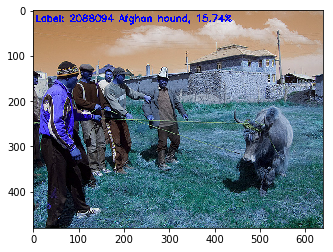

In [0]:
# set the input to the pre-trained deep learning network and obtain
# the output predicted probabilities for each of the 1,000 ImageNet
# classes
import matplotlib.pyplot as plt 

net.setInput(blob)
preds = net.forward()
 
# sort the probabilities (in descending) order, grab the index of the
# top predicted label, and draw it on the input image
idx = np.argsort(preds[0])[::-1][0]
text = "Label: {}, {:.2f}%".format(classes[idx],
	preds[0][idx] * 100)
cv2.putText(image, text, (5, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 0, 255), 2)
 

plt.imshow(image)

#print(np.argsort(preds))


for top in range(0,10):
  idx = np.argsort(preds[0])[::-1][top]
  text = "Label: {}, {:.2f}%".format(classes[idx],
    preds[0][idx] * 100)

  print(text)


Label: 2088094 Afghan hound, 15.74%
Label: 2437312 Arabian camel, 10.73%
Label: 2101006 Gordon setter, 7.79%
Label: 2090721 Irish wolfhound, 5.61%
Label: 2100735 English setter, 3.76%
Label: 2100877 Irish setter, 3.58%
Label: 2101556 clumber, 3.42%
Label: 2098105 soft-coated wheaten terrier, 3.17%
Label: 2096051 Airedale, 2.92%
Label: 2403003 ox, 2.87%
